In [151]:
import pandas as pd
import numpy as np


In [152]:
data = pd.read_csv( 'adult.csv' )
data.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [154]:
data["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [155]:
data["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [156]:
data["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [157]:
def drop_question_marks(row, colname=''):
    if '?' in row[colname]:
        row[colname] = 'Unknown'
    return row


In [158]:
data = data.apply(drop_question_marks, axis=1, colname='occupation')

In [159]:
data["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [160]:
data = data.apply(drop_question_marks, axis=1, colname='workclass')

In [161]:
data = data.apply(drop_question_marks, axis=1, colname='native-country')

In [162]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [163]:
def count_income(row):
    if '>50K' in row['income']:
        return 1
    else:
        return 0

data['income'] = data.apply(count_income, axis=1)
data['income'].value_counts()


0    37155
1    11687
Name: income, dtype: int64

In [164]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
gender_cat = data["gender"]
gender_cat_encoded = encoder.fit_transform(gender_cat)
gender_cat_encoded

array([1, 1, 1, ..., 0, 1, 0])

In [165]:
data["gender"] = gender_cat_encoded
data["gender"].head()

0    1
1    1
2    1
3    1
4    0
Name: gender, dtype: int64

In [166]:
encoder = LabelEncoder()
country_cat = data["native-country"]
country_cat_encoded = encoder.fit_transform(country_cat)

data["native-country"] = country_cat_encoded
data["native-country"].tail(10)

48832    38
48833    38
48834    35
48835    38
48836    38
48837    38
48838    38
48839    38
48840    38
48841    38
Name: native-country, dtype: int64

In [167]:
country_cat = data["native-country"]
country_cat_encoded = encoder.fit_transform(country_cat)

data["native-country"] = country_cat_encoded
data["native-country"].tail(10)

48832    38
48833    38
48834    35
48835    38
48836    38
48837    38
48838    38
48839    38
48840    38
48841    38
Name: native-country, dtype: int64

In [168]:
workclass_cat = data["workclass"]
workclass_cat_encoded = encoder.fit_transform(workclass_cat)

data["workclass"] = workclass_cat_encoded
data["workclass"].tail(10)

48832    3
48833    3
48834    3
48835    3
48836    3
48837    3
48838    3
48839    3
48840    3
48841    4
Name: workclass, dtype: int64

In [169]:
education_cat = data["education"]
education_cat_encoded = encoder.fit_transform(education_cat)

data["education"] = education_cat_encoded
data["education"].tail(10)

48832     0
48833     8
48834    12
48835    12
48836    15
48837     7
48838    11
48839    11
48840    11
48841    11
Name: education, dtype: int64

In [170]:
mar_stat_cat = data["marital-status"]
mar_stat_cat_encoded = encoder.fit_transform(mar_stat_cat)

data["marital-status"] = mar_stat_cat_encoded
data["marital-status"].tail(10)

48832    2
48833    2
48834    4
48835    2
48836    4
48837    2
48838    2
48839    6
48840    4
48841    2
Name: marital-status, dtype: int64

In [171]:
occupation_cat = data["occupation"]
occupation_cat_encoded = encoder.fit_transform(occupation_cat)

data["occupation"] = occupation_cat_encoded
data["occupation"].tail(10)

48832     5
48833    11
48834    12
48835     3
48836    10
48837    12
48838     6
48839     0
48840     0
48841     3
Name: occupation, dtype: int64

In [172]:
relationship_cat = data["relationship"]
relationship_cat_encoded = encoder.fit_transform(relationship_cat)

data["relationship"] = relationship_cat_encoded
data["relationship"].tail(10)

48832    0
48833    0
48834    1
48835    0
48836    1
48837    5
48838    0
48839    4
48840    3
48841    5
Name: relationship, dtype: int64

In [173]:
race_cat = data["race"]
race_cat_encoded = encoder.fit_transform(race_cat)

data["race"] = race_cat_encoded
data["race"].tail(10)

48832    0
48833    4
48834    1
48835    4
48836    4
48837    4
48838    4
48839    4
48840    4
48841    4
Name: race, dtype: int64

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null int64
fnlwgt             48842 non-null int64
education          48842 non-null int64
educational-num    48842 non-null int64
marital-status     48842 non-null int64
occupation         48842 non-null int64
relationship       48842 non-null int64
race               48842 non-null int64
gender             48842 non-null int64
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null int64
income             48842 non-null int64
dtypes: int64(15)
memory usage: 5.6 MB


In [175]:
data.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.329327,1.896641e+05,10.288420,10.078089,2.618750,6.440379,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.453442,0.239282
std,13.710510,1.433938,1.056040e+05,3.874492,2.570973,1.507703,4.329470,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,6.038723,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.175505e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.781445e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.376420e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [176]:
corr_matrix = data.corr()
corr_matrix

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.053008,-0.076628,-0.015058,0.030940,-0.263978,0.006784,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002666,0.230369
workclass,0.053008,1.000000,-0.024252,-0.009439,-0.045869,0.037592,0.281215,0.007591,0.029526,0.010145,0.012057,-0.004650,-0.078044,-0.001822,-0.054680
fnlwgt,-0.076628,-0.024252,1.000000,-0.022570,-0.038761,0.029851,-0.003519,0.009092,-0.027062,0.027739,-0.003706,-0.004366,-0.013519,-0.058392,-0.006339
education,-0.015058,-0.009439,-0.022570,1.000000,0.359668,-0.037417,-0.038054,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.075101,0.080091
educational-num,0.030940,-0.045869,-0.038761,0.359668,1.000000,-0.069992,0.045126,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.090643,0.332613
marital-status,-0.263978,0.037592,0.029851,-0.037417,-0.069992,1.000000,0.050256,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.017621,-0.199072
occupation,0.006784,0.281215,-0.003519,-0.038054,0.045126,0.050256,1.000000,-0.010773,-0.009934,0.021866,0.008157,0.006845,-0.060462,-0.000417,0.007275
relationship,-0.263383,0.007591,0.009092,-0.010758,-0.090534,0.187800,-0.010773,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.007018,-0.253214
race,0.028421,0.029526,-0.027062,0.013250,0.029239,-0.070104,-0.009934,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.114995,0.070934
gender,0.088120,0.010145,0.027739,-0.027041,0.009328,-0.127479,0.021866,-0.579797,0.086734,1.000000,0.047094,0.045480,0.228560,-0.002181,0.214628


In [177]:
import seaborn as sns

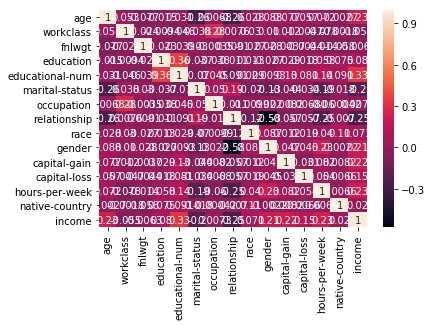

In [178]:
sns.heatmap(corr_matrix, annot=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [179]:
data_selected_columns = data[ [ 'age', 'workclass','gender', 'occupation', 'capital-gain', 'education', 'educational-num', 'income', 'hours-per-week'] ]

In [134]:
#columns = data_selected_columns.columns

In [135]:
#Нормировка значений
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(data_selected_columns)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [136]:
#data_scaled = scaler.transform(data_selected_columns)
#data_scaled = pd.DataFrame(data_scaled, columns=columns)
#data_scaled.head(10)

,age,workclass,gender,occupation,capital-gain,education,educational-num,income,hours-per-week
0,-0.995129,-0.229669,0.70422,-0.101718,-0.144804,-2.397350,-1.197259,-0.560845,-0.034087
1,-0.046942,-0.229669,0.70422,-0.563673,-0.144804,0.183660,-0.419335,-0.560845,0.772930
2,-0.776316,-1.624444,0.70422,0.822192,-0.144804,-0.848744,0.747550,1.783024,-0.034087
3,0.390683,-0.229669,0.70422,-0.101718,0.886874,1.216063,-0.030373,1.783024,-0.034087
4,-1.505691,2.559881,-1.42001,1.746102,-0.144804,1.216063,-0.030373,-0.560845,-0.841104
5,-0.338691,-0.229669,0.70422,0.129260,-0.144804,-2.655451,-1.586221,-0.560845,-0.841104
6,-0.703379,2.559881,0.70422,1.746102,-0.144804,0.183660,-0.419335,-0.560845,-0.034087
7,1.776496,1.165106,0.70422,0.591215,0.271598,0.957962,1.914436,1.783024,-0.679700
8,-1.068066,-0.229669,-1.42001,0.129260,-0.144804,1.216063,-0.030373,-0.560845,-0.034087
9,1.192996,-0.229669,0.70422,-1.025628,-0.144804,-1.364946,-2.364144,-0.560845,-2.455137


In [180]:
corr_matrix = data_selected_columns.corr()
corr_matrix

,age,workclass,gender,occupation,capital-gain,education,educational-num,income,hours-per-week
age,1.000000,0.053008,0.088120,0.006784,0.077229,-0.015058,0.030940,0.230369,0.071558
workclass,0.053008,1.000000,0.010145,0.281215,0.012057,-0.009439,-0.045869,-0.054680,-0.078044
gender,0.088120,0.010145,1.000000,0.021866,0.047094,-0.027041,0.009328,0.214628,0.228560
occupation,0.006784,0.281215,0.021866,1.000000,0.008157,-0.038054,0.045126,0.007275,-0.060462
capital-gain,0.077229,0.012057,0.047094,0.008157,1.000000,0.028928,0.125146,0.223013,0.082157
education,-0.015058,-0.009439,-0.027041,-0.038054,0.028928,1.000000,0.359668,0.080091,0.057659
educational-num,0.030940,-0.045869,0.009328,0.045126,0.125146,0.359668,1.000000,0.332613,0.143689
income,0.230369,-0.054680,0.214628,0.007275,0.223013,0.080091,0.332613,1.000000,0.227687
hours-per-week,0.071558,-0.078044,0.228560,-0.060462,0.082157,0.057659,0.143689,0.227687,1.000000


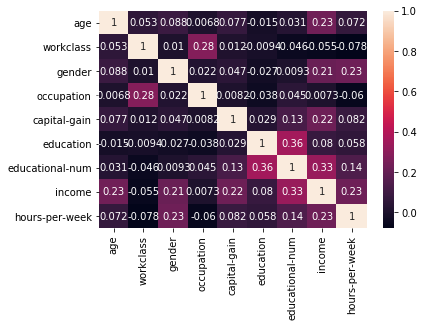

In [181]:
sns.heatmap(corr_matrix, annot=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [182]:
data_selected_columns = data_selected_columns.drop("occupation", axis=1) 
data_selected_columns = data_selected_columns.drop("workclass", axis=1)

In [183]:
data_selected_columns.head()

,age,gender,capital-gain,education,educational-num,income,hours-per-week
0,25,1,0,1,7,0,40
1,38,1,0,11,9,0,50
2,28,1,0,7,12,1,40
3,44,1,7688,15,10,1,40
4,18,0,0,15,10,0,30


In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
# записываем в переменную y столбец income
y = data_selected_columns['income'] 
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [186]:
X = data_selected_columns

# столбец income является целевой переменной, удаляем его из X
del X['income']
X.head()

,age,gender,capital-gain,education,educational-num,hours-per-week
0,25,1,0,1,7,40
1,38,1,0,11,9,50
2,28,1,0,7,12,40
3,44,1,7688,15,10,40
4,18,0,0,15,10,30


In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [189]:
X_train.shape

(32724, 6)

In [190]:
y_train.shape

(32724,)

In [191]:
model = LogisticRegression()

In [194]:
# обучаем модель
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
model.score(X_train, y_train)

0.8168011245569001

In [196]:
# получаем прогнозные значения модели
predictions = model.predict_proba(X_test)

In [197]:
predictions[:10]

array([[0.89118995, 0.10881005],
       [0.90614486, 0.09385514],
       [0.04663809, 0.95336191],
       [0.87885031, 0.12114969],
       [0.86413072, 0.13586928],
       [0.97269725, 0.02730275],
       [0.71500403, 0.28499597],
       [0.89041884, 0.10958116],
       [0.85024701, 0.14975299],
       [0.93392151, 0.06607849]])

In [201]:
for line in zip( predictions[:, 1], y_test ):
    print( line )

(0.10881004742925814, 0)
(0.09385514328895977, 0)
(0.9533619120481588, 1)
(0.12114968550640619, 0)
(0.1358692777359712, 0)
(0.02730275497780331, 0)
(0.28499597366148965, 0)
(0.10958115616035549, 1)
(0.1497529944814243, 0)
(0.06607849400824196, 0)
(0.4503154161135029, 0)
(0.20405641463113433, 0)
(0.282004436818477, 0)
(0.04359825828093792, 0)
(0.3767116970326025, 0)
(0.36325243793507894, 0)
(0.13115002913717994, 0)
(0.01280111123468759, 0)
(0.37103342806417744, 1)
(0.030723102406197005, 0)
(0.27366661838146955, 0)
(0.3906758982872802, 1)
(0.12556540092704246, 1)
(0.9857895817000547, 1)
(0.13587235165686753, 0)
(0.041869431471758194, 0)
(0.29202319519276654, 0)
(0.1161942110537989, 0)
(0.10565963205660221, 0)
(0.041255275400367955, 0)
(0.18647636011734814, 1)
(0.4559065510584353, 1)
(0.16044889278660113, 0)
(0.04228416460908921, 0)
(0.16945125766495803, 0)
(0.03462002343574894, 0)
(0.6266216656914436, 0)
(0.09385514328895977, 0)
(0.26865428719366924, 0)
(0.07165880100415109, 0)
(0.130247

(0.014949515969717674, 0)
(0.06795005394314614, 0)
(0.11364969049346292, 0)
(0.014569166351143649, 0)
(0.26545035792622584, 1)
(0.41576866997199446, 1)
(0.11271920296541729, 1)
(0.026030113731104237, 0)
(0.012961355593564039, 0)
(0.15090844392344352, 0)
(0.5272294623481154, 1)
(0.34841495046158644, 0)
(0.06206440515860882, 0)
(0.08402976483012074, 0)
(0.2233004958647537, 0)
(0.09385514328895977, 0)
(0.05972927178891992, 0)
(0.12408587575596815, 0)
(0.01726766736398376, 0)
(0.07498870085418229, 0)
(0.12556540092704246, 0)
(0.07985166637463013, 0)
(0.3767116970326025, 0)
(0.1604471294315281, 1)
(0.14974966095057587, 0)
(0.2933872790815029, 1)
(0.398601431741884, 1)
(0.435737163555088, 0)
(0.11065210335236454, 0)
(0.09762913067583981, 0)
(0.14281334404156043, 1)
(0.13886173905111873, 0)
(0.3707212996639284, 1)
(0.12143547183883995, 0)
(0.12124143500783047, 0)
(0.27506683314050034, 0)
(0.9999999999999623, 1)
(0.2321928039780291, 0)
(0.5272294623481154, 0)
(0.12211894419698169, 0)
(0.527239

(0.3227293180617818, 1)
(0.043199377560795976, 0)
(0.1034316861760259, 0)
(0.011261166903399452, 0)
(0.40588137538431884, 1)
(0.1550239231185248, 0)
(0.021082962641169958, 0)
(0.017342987523297677, 0)
(0.025144781682776708, 0)
(0.8427183638770595, 0)
(0.013122991746616587, 0)
(0.14281013904208154, 0)
(0.20524788784712866, 0)
(0.21143333886256951, 1)
(0.0709284327408176, 0)
(0.43172329700927525, 1)
(0.9999999999999827, 1)
(0.20277612270725934, 1)
(0.13587235165686753, 0)
(0.09385601458410542, 0)
(0.05295074127580177, 0)
(0.21784197249370812, 1)
(0.16602640432793656, 0)
(0.4785769227484089, 1)
(0.07985166637463013, 0)
(0.17176185972691405, 0)
(0.1285900179064285, 0)
(0.5581564402559636, 0)
(0.005653743419694906, 0)
(0.017342987523297677, 0)
(0.044223764409216805, 1)
(0.39322642151391785, 0)
(0.04881688910063362, 1)
(0.1789824943526062, 0)
(0.04319991863817078, 0)
(0.2501504649778273, 0)
(0.5437956838875025, 1)
(0.012469044542666051, 0)
(0.2590806410185289, 0)
(0.20578532332485316, 0)
(0.

(0.01790866412305015, 0)
(0.13389617523524713, 0)
(0.7546684190695979, 0)
(0.31745630463842045, 0)
(0.22189665853397222, 0)
(0.430178554201987, 0)
(0.9316106725985354, 1)
(0.07681815894666126, 0)
(0.9999045685869331, 1)
(0.07690402841040378, 0)
(0.07220034873310291, 0)
(0.934125347797274, 1)
(0.11856825933694526, 1)
(0.18990084068529828, 0)
(0.11686850201283895, 1)
(0.09748117065652223, 0)
(0.04031629954156349, 0)
(0.9155616192164928, 1)
(0.016845597718538302, 0)
(0.0358900537357744, 0)
(0.003413290329597222, 0)
(0.303597525333393, 0)
(0.6639075314470333, 0)
(0.10186119352848104, 1)
(0.08031475536769475, 0)
(0.2207633712106897, 0)
(0.1301182333757582, 0)
(0.42340346928964323, 0)
(0.15502735265079243, 0)
(0.5113847769353159, 0)
(0.11971920573351978, 0)
(0.3544663408308872, 0)
(0.11271920296541729, 0)
(0.10113942881851054, 0)
(0.2903542171933642, 0)
(0.509357203469831, 1)
(0.9084995046846621, 1)
(0.29440687228699747, 1)
(0.36508161372193293, 0)
(0.6360616623580977, 0)
(0.0319925308732314

(0.21784197249370812, 0)
(0.05059667214116832, 0)
(0.4301721365732923, 0)
(0.09052913844722439, 0)
(0.09395254705038697, 0)
(0.6454433935199945, 1)
(0.6585879395772792, 0)
(0.169050088434287, 0)
(0.09043923681809453, 0)
(0.29338999290591294, 0)
(0.10881004742925814, 0)
(0.08085439959491236, 0)
(0.07220385642192448, 0)
(0.1853903877150123, 0)
(0.1255668382596837, 0)
(0.1446257475291433, 0)
(0.031704585038884785, 0)
(0.666007864455377, 1)
(0.04907668806496638, 0)
(0.16295478125509538, 0)
(0.2546287512867611, 0)
(0.22330503667857796, 0)
(0.025129113226099835, 0)
(0.8631078009023244, 0)
(0.3577362698126229, 1)
(0.04533258371125443, 0)
(0.14361861766008616, 0)
(0.328606033216022, 0)
(0.10957987888115589, 1)
(0.4989888364465475, 0)
(0.09691333763686379, 1)
(0.2546237823311011, 1)
(0.2798050375719878, 0)
(0.14462898640025024, 0)
(0.0579433402607942, 0)
(0.09980957042427882, 0)
(0.0885134015355917, 1)
(0.03835003524725, 0)
(0.3888631092476314, 0)
(0.6993372199060848, 1)
(0.7678091504766543, 1)

(0.03840964651582808, 0)
(0.23778747595153873, 1)
(0.4966385612973594, 1)
(0.15847668172636398, 0)
(0.18835015897874224, 0)
(0.17047675473535492, 0)
(0.15847668172636398, 0)
(0.435737163555088, 1)
(0.18369206371257046, 0)
(0.46605977560547174, 0)
(0.08402875727228849, 0)
(0.08393867551164526, 0)
(0.027883048625669475, 0)
(0.08801176622851233, 0)
(0.3688689345101324, 0)
(0.3688719820558057, 1)
(0.20277823890692162, 0)
(0.3391964986411848, 0)
(0.6454403977917951, 1)
(0.07561676548401004, 1)
(0.07758700997137143, 0)
(0.0402142622445059, 0)
(0.09261009587433881, 0)
(0.017595994598057853, 0)
(0.053208710008429035, 0)
(0.04822405241771474, 0)
(0.07976471176225598, 0)
(0.13184481151650468, 0)
(0.7988175928670631, 1)
(0.5475309633027284, 0)
(0.17410260195363628, 1)
(0.9227132474145926, 1)
(0.013279002395210546, 0)
(0.3671816517073009, 0)
(0.4848525795623735, 0)
(0.36534463341562545, 0)
(0.08290412773234601, 0)
(0.03376790163321006, 0)
(0.12569114906706266, 0)
(0.10067378963499439, 0)
(0.004539

(0.03311693375025969, 0)
(0.05719920189989413, 0)
(0.18149397028716927, 0)
(0.10881004742925814, 0)
(0.18369795254098648, 0)
(0.12556540092704246, 0)
(0.010382603807330387, 0)
(0.06959043836399371, 0)
(0.22330276626344206, 0)
(0.07498870085418229, 0)
(0.033281670633128715, 0)
(0.11645755958865253, 0)
(0.4996600952269749, 0)
(0.9999999999999625, 1)
(0.3301041766507402, 1)
(0.12114968550640619, 0)
(0.5721977903407607, 1)
(0.3714104379191988, 0)
(0.1301182333757582, 0)
(0.5277579984385796, 1)
(0.4660532604961131, 0)
(0.05668466091523457, 0)
(0.9560912952895402, 1)
(0.1550239231185248, 0)
(0.1457500479049087, 0)
(0.033281670633128715, 0)
(0.2933872790815029, 0)
(0.016818506578257633, 0)
(0.19394390514294568, 0)
(0.08281514260884554, 0)
(0.09043923681809453, 0)
(0.022950447626664382, 0)
(0.028765224633694464, 0)
(0.5498687112101303, 1)
(0.14162346366542897, 0)
(0.021072805071057986, 0)
(0.1112546363567837, 0)
(0.30868010868289414, 0)
(0.19625456244336448, 0)
(0.01955936580132559, 0)
(0.0353

(0.7343643940109468, 1)
(0.6742332733428765, 1)
(0.03135392129598619, 0)
(0.4989921090702917, 0)
(0.8767454740777519, 1)
(0.24526801995595995, 1)
(0.06802028212000107, 0)
(0.0769021698402051, 0)
(0.09738510443942323, 0)
(0.23047005901599973, 0)
(0.03971309336038122, 0)
(0.2578758192125242, 1)
(0.0722047333686844, 0)
(0.05013212157644444, 0)
(0.509354276787704, 0)
(0.00890914782885732, 0)
(0.10565963205660221, 0)
(0.09748232235060252, 0)
(0.6191603893568028, 0)
(0.03841013000958571, 0)
(0.16045065615735013, 0)
(0.13686497438593404, 0)
(0.3211399875662065, 0)
(0.04279586913455854, 0)
(0.4559065510584353, 1)
(0.0749868848122615, 0)
(0.09748577750566592, 0)
(0.2638659211161596, 0)
(0.1035391079999182, 0)
(0.11080971633711346, 0)
(0.1429535414095957, 0)
(0.06699236778374136, 0)
(0.2259538269438068, 0)
(0.09043923681809453, 0)
(0.5378754147116602, 1)
(0.11605668393259908, 1)
(0.11271920296541729, 0)
(0.10869908833816891, 0)
(0.19625869224860082, 0)
(0.13310366181460925, 0)
(0.334140150712296

(0.03263134295849661, 0)
(0.4582427969033565, 1)
(0.018089789588229432, 0)
(0.017342987523297677, 0)
(0.10831334871435519, 0)
(0.5163074869869647, 1)
(0.20703185104218663, 0)
(0.17175813524335254, 0)
(0.0055600292646004155, 0)
(0.15326152437693938, 0)
(0.361930580681068, 1)
(0.02568344487709122, 0)
(0.023716926115263298, 0)
(0.13417697479333918, 0)
(0.4337890587387013, 0)
(0.0719336785900944, 0)
(0.30002613393267086, 0)
(0.9886521407753878, 1)
(0.13310366181460925, 0)
(0.325113809373041, 1)
(0.509364306654417, 1)
(0.24702275302025978, 0)
(0.46605651804934517, 1)
(0.23777798571745798, 0)
(0.03745684575249271, 0)
(0.06608010971775108, 0)
(0.07336533526823608, 1)
(0.12556540092704246, 0)
(0.39419704313585063, 1)
(0.2933872790815029, 0)
(0.5741617238438518, 0)
(0.06959043836399371, 0)
(0.1301182333757582, 0)
(0.24255443851074074, 1)
(0.5272294623481154, 1)
(0.18771416072456443, 1)
(0.12395581975151428, 0)
(0.1562160204996005, 0)
(0.11802321647048597, 0)
(0.35097246494018824, 0)
(0.09118395

In [202]:
model.score(X_test, y_test)

0.8224965876659636

# Оценка качества модели
Считаем accuracy последней модели

In [203]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [204]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [205]:
for line in zip( pr, re, thres ):
    print( line )

(0.2472684703433923, 1.0, 0.01724825193282949)
(0.24721951219512195, 0.9997369805365597, 0.01726766736398376)
(0.24723559255886562, 0.9997369805365597, 0.01734276443285553)
(0.24725167501463605, 0.9997369805365597, 0.017342987523297677)
(0.2474609375, 0.9997369805365597, 0.01737016130254467)
(0.24749316317228806, 0.9997369805365597, 0.017389711532313678)
(0.24750927915608517, 0.9997369805365597, 0.017507267071866114)
(0.24755763970300898, 0.9997369805365597, 0.01752741970088336)
(0.24757376408519507, 0.9997369805365597, 0.017527870550541804)
(0.24762214983713354, 0.9997369805365597, 0.01753915936641956)
(0.2476382826242752, 0.9997369805365597, 0.017595994598057853)
(0.24768669360093837, 0.9997369805365597, 0.01762325711261074)
(0.247702834799609, 0.9997369805365597, 0.01765985419786666)
(0.24775127102072741, 0.9997369805365597, 0.01776539784810067)
(0.24776742063750734, 0.9997369805365597, 0.017798747443152203)
(0.24778357235984355, 0.9997369805365597, 0.01782014596092986)
(0.247799726

(0.32697005337917306, 0.9505523408732246, 0.09196712399730368)
(0.32690915671371695, 0.9502893214097843, 0.09202186490309096)
(0.32684824902723736, 0.9500263019463441, 0.09209916882583417)
(0.3269074124355145, 0.9500263019463441, 0.09223419170690085)
(0.3269665972662261, 0.9500263019463441, 0.09247445573553517)
(0.3269961977186312, 0.9500263019463441, 0.09247555433857806)
(0.3270258035310095, 0.9500263019463441, 0.09254403700042818)
(0.3270554147048171, 0.9500263019463441, 0.09256507502222389)
(0.32708503124151045, 0.9500263019463441, 0.09256947337179412)
(0.3271146531425466, 0.9500263019463441, 0.0925705729885102)
(0.3271442804093832, 0.9500263019463441, 0.0926078958095065)
(0.32717391304347826, 0.9500263019463441, 0.09260899583605618)
(0.3273221567739012, 0.9500263019463441, 0.09261009587433881)
(0.3274705349048051, 0.9500263019463441, 0.09270303654996571)
(0.3275002266751292, 0.9500263019463441, 0.09270744078522695)
(0.32791500181620054, 0.9497632824829038, 0.09270854187339522)
(0.3

(0.5272547076313181, 0.6996317727511836, 0.27856496296231253)
(0.5275684252280841, 0.6996317727511836, 0.27856759373194045)
(0.5277777777777778, 0.6996317727511836, 0.27857022451681984)
(0.5278825163722961, 0.6996317727511836, 0.2785728553169507)
(0.5279872965462485, 0.6996317727511836, 0.27857548613233285)
(0.5280921183243994, 0.6996317727511836, 0.2785962751806264)
(0.528196981731533, 0.6996317727511836, 0.2787045999037424)
(0.5283018867924528, 0.6996317727511836, 0.2787665597657097)
(0.5284068335319825, 0.6996317727511836, 0.27979448596926837)
(0.5285118219749653, 0.6996317727511836, 0.27979712384713645)
(0.5286168521462639, 0.6996317727511836, 0.27980239964849635)
(0.5290489454834859, 0.6993687532877433, 0.2798050375719878)
(0.5291542288557214, 0.6993687532877433, 0.2798076755106866)
(0.5292595541401274, 0.6993687532877433, 0.2800310782534771)
(0.5292712066905615, 0.699105733824303, 0.2804608782040736)
(0.5299043062200957, 0.699105733824303, 0.2804661616471417)
(0.5298105682951146,

(0.8743455497382199, 0.21962125197264598, 0.7246833028698919)
(0.8752620545073375, 0.21962125197264598, 0.7248308432903655)
(0.8761804826862539, 0.21962125197264598, 0.7248700914885936)
(0.8759200841219769, 0.21909521304576537, 0.7254565821616346)
(0.8757894736842106, 0.21883219358232509, 0.7260920964075965)
(0.8767123287671232, 0.21883219358232509, 0.7263119285405928)
(0.8776371308016878, 0.21883219358232509, 0.7263223371264698)
(0.8785638859556494, 0.21883219358232509, 0.7263275413268973)
(0.8792372881355932, 0.2183061546554445, 0.727247066487241)
(0.8791092258748674, 0.21804313519200422, 0.7275114086441266)
(0.8789808917197452, 0.2177801157285639, 0.72754810085588)
(0.8788522848034006, 0.2175170962651236, 0.7278425080889389)
(0.8787234042553191, 0.21725407680168332, 0.7278451011590157)
(0.8785942492012779, 0.21699105733824303, 0.7281147645216369)
(0.8795309168443497, 0.21699105733824303, 0.7281199473962531)
(0.87940234791889, 0.21672803787480274, 0.7307313515515158)
(0.8792735042735

In [206]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


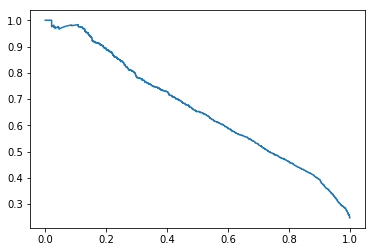

In [207]:
plt.plot( re, pr )

In [208]:
from sklearn.metrics import average_precision_score

In [210]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.6630790807882345

### ROC (Receiver Operating Characteristic)

In [211]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [214]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [213]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0002630194634402946, 0.9999999999999949)
(0.0, 0.001841136244082062, 0.9999999999999853)
(0.0, 0.002367175170962651, 0.999999999999984)
(0.0, 0.0028932140978432403, 0.9999999999999833)
(0.0, 0.003682272488164124, 0.9999999999999827)
(0.0, 0.0052603892688058915, 0.9999999999999807)
(0.0, 0.005523408732246186, 0.9999999999999805)
(0.0, 0.006049447659126775, 0.9999999999999798)
(0.0, 0.00631246712256707, 0.9999999999999789)
(0.0, 0.006838506049447659, 0.999999999999978)
(0.0, 0.0097317201472909, 0.999999999999966)
(0.0, 0.010520778537611783, 0.9999999999999625)
(0.0, 0.011572856391372961, 0.9999999999999489)
(0.0, 0.012361914781693845, 0.9999999999999412)
(0.0, 0.01604418726985797, 0.9999999999998543)
(0.0, 0.01657022619673856, 0.9999999999998213)
(0.0, 0.020778537611783273, 0.9999999999981697)
(0.00016239038648911984, 0.020778537611783273, 0.99995533628916)
(0.00016239038648911984, 0.02472382956338769, 0.9997155457448184)
(0.00016239038648911984, 0.02524986849026828, 0.9997058863

(0.3082169535563495, 0.8169384534455549, 0.19625869224860082)
(0.30837934394283856, 0.8169384534455549, 0.19625662733777233)
(0.3108963949334199, 0.8185165702261967, 0.19625456244336448)
(0.3109775901266645, 0.818779589689637, 0.19625249756537727)
(0.3112211757063982, 0.818779589689637, 0.19483752672814908)
(0.311627151672621, 0.8190426091530774, 0.1948334195787775)
(0.31187073725235465, 0.8190426091530774, 0.19412702508517932)
(0.3121955180253329, 0.8190426091530774, 0.19395209103837027)
(0.3126014939915557, 0.8195686480799579, 0.19394799805786211)
(0.3127638843780448, 0.8195686480799579, 0.19394595159220496)
(0.31414420266320237, 0.8216728037874803, 0.19394390514294568)
(0.3148749594024034, 0.8216728037874803, 0.19275295007868706)
(0.3148749594024034, 0.8219358232509205, 0.19274683951389457)
(0.3150373497888925, 0.8219358232509205, 0.192423208066963)
(0.3151997401753816, 0.8221988427143608, 0.19242161604999333)
(0.31536213056187073, 0.8221988427143608, 0.19232382747156873)
(0.3153621

(0.9840857421240663, 1.0, 0.007095936813118468)
(0.9842481325105554, 1.0, 0.0069370556327484215)
(0.984491718090289, 1.0, 0.0069256775808255785)
(0.9853848652159792, 1.0, 0.006661062808684129)
(0.9857096459889575, 1.0, 0.006650393834522231)
(0.986521597921403, 1.0, 0.006438622602873291)
(0.9866839883078922, 1.0, 0.006437998289462309)
(0.9867651835011367, 1.0, 0.006434617259115472)
(0.9870087690808704, 1.0, 0.006388939969314237)
(0.9879019162065605, 1.0, 0.005936001359962307)
(0.9885514777525171, 1.0, 0.0058880167528699)
(0.9887138681390062, 1.0, 0.0058026541950560555)
(0.9888762585254953, 1.0, 0.005790441991545154)
(0.9890386489119845, 1.0, 0.0056628226203004305)
(0.9901753816174083, 1.0, 0.005653743419694906)
(0.990418967197142, 1.0, 0.00560233685100675)
(0.9905813575836311, 1.0, 0.00556910380628266)
(0.9906625527768756, 1.0, 0.0055689588149189125)
(0.9909873335498538, 1.0, 0.0055600292646004155)
(0.9911497239363429, 1.0, 0.005473002812557321)
(0.9913121143228321, 1.0, 0.0053873311328

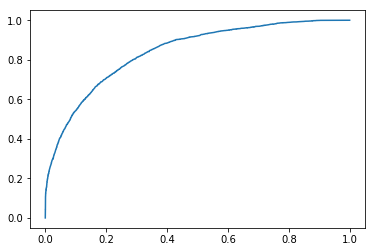

In [215]:
plt.plot( fpr, tpr )

In [216]:
from sklearn.metrics import roc_auc_score

In [217]:
roc_auc_score( y_test, predictions[:, 1] )

0.8407031033904823

# Считаем площадь под ROC-кривой с помощью более общего метода auc

In [218]:
from sklearn.metrics import auc

In [219]:
auc( fpr, tpr )

0.8407031033904823

# Decision Tree

In [220]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth=15, min_samples_leaf=20)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [221]:
def show_auc(y, y_pred, plot_label='', prin=True):    
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    if prin:
        print('ROC AUC: {0:.4f}'.format(auc_val))
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    return auc_val

Train:
ROC AUC: 0.8818
Test:
ROC AUC: 0.8548


0.8548048846618224

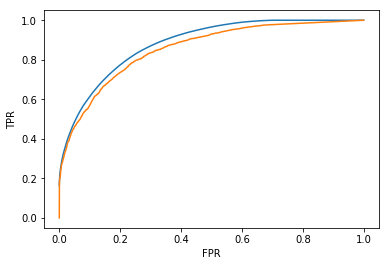

In [222]:
y_pred_test = clf_tree.predict_proba(X_test)[:, 1]
y_pred_train = clf_tree.predict_proba(X_train)[:, 1]

print('Train:')
show_auc(y_train, y_pred_train, 'train')
         
print('Test:')
show_auc(y_test, y_pred_test, 'test')